In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from scipy.stats import binned_statistic
import seaborn as sns
from utilities import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


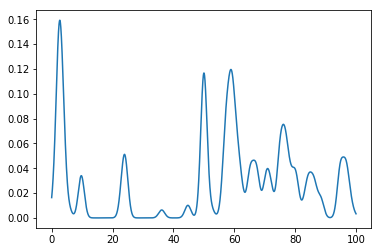

In [94]:
df = pd.read_csv("data/processed_swc/CPU_001.processed.axon_density.txt", header=None, delimiter="\t")

x = np.linspace(0, 100, len(df))                 
y = np.array(df.iloc[:,1])
y_smooth = smooth(x, np.log(y+1), 1)

plt.plot(x, y_smooth)


In [107]:
def bin_average(x, y, nbins=100):
    x_bins = np.arange(nbins)
    y_bins = binned_statistic(x, y, statistic='mean', bins=nbins).statistic
    return [x_bins, y_bins]

def smooth(x, y, sigma, norm=True):
    smoothed_vals = np.zeros(y.shape)
    for i in range(len(x)):
        x_position = x[i]
        kernel = np.exp(-(x - x_position) ** 2 / (2 * sigma ** 2))
        kernel = kernel / sum(kernel)
        smoothed_vals[i] = sum(y * kernel)
    if norm:
        smoothed_vals = smoothed_vals / sum(smoothed_vals) * 100
    return smoothed_vals

Text(0,0.5,'Normalized density')

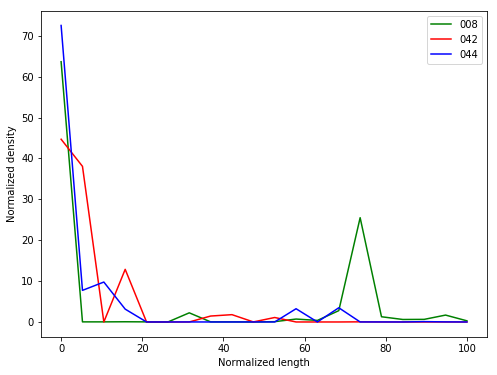

In [131]:
nbins = 20
relative_step = 0.01
x_bins_plot = np.linspace(0,100,nbins)
df = pd.read_csv("data/processed_swc/CPU_008.processed.axon_density.txt", header=None, delimiter="\t")

plt.subplots(1,1,figsize=(8,6))
# x_bins, y_bins = bin_average(df.iloc[:,0], np.log(df.loc[:,1]+1), nbins)
x_bins, y_bins = bin_average(df.iloc[:,0], df.loc[:,1], nbins)
y_bins_smooth = smooth(x_bins, y_bins, nbins*relative_step)

plt.plot(x_bins_plot, y_bins_smooth, label='008', c='g')

df = pd.read_csv("data/processed_swc/CPU_042.processed.axon_density.txt", header=None, delimiter="\t")
x_bins, y_bins = bin_average(df.iloc[:,0], df.loc[:,1], nbins)
y_bins_smooth = smooth(x_bins, y_bins, nbins*relative_step)

plt.plot(x_bins_plot, y_bins_smooth, label='042', c='r')

df = pd.read_csv("data/processed_swc/CPU_044.processed.axon_density.txt", header=None, delimiter="\t")
x_bins, y_bins = bin_average(df.iloc[:,0], df.loc[:,1], nbins)
y_bins_smooth = smooth(x_bins, y_bins, nbins*relative_step)

plt.plot(x_bins_plot, y_bins_smooth, label='044', c='b')

plt.legend()
plt.xlabel('Normalized length')
plt.ylabel('Normalized density')

Text(0,0.5,'Normalized density')

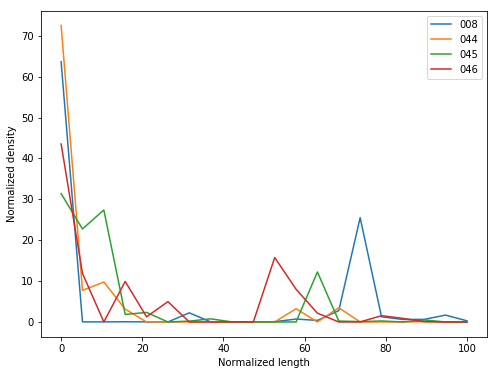

In [133]:
nbins = 20
relative_step = 0.01
x_bins_plot = np.linspace(0,100,nbins)
indeces = ['008', '044','045','046']
plt.subplots(1,1,figsize=(8,6))

for idx in indeces:   
    df = pd.read_csv("data/processed_swc/CPU_"+idx+".processed.axon_density.txt", header=None, delimiter="\t")
    x_bins, y_bins = bin_average(df.iloc[:,0], df.loc[:,1], nbins)
    y_bins_smooth = smooth(x_bins, y_bins, nbins*relative_step)
    plt.plot(x_bins_plot, y_bins_smooth, label=idx)

plt.legend()
plt.xlabel('Normalized length')
plt.ylabel('Normalized density')